# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [42]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print ("Dataset has {} rows, {} columns".format(*data.shape))
print (data.head())  # print the first 5 rows
print ("Variance:")
print (data.var())

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
Variance:
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

PCA transform the features to uncorrelated variables and tries to preserve the variance. The principal components that will show up first would be categories with the largest variance. I guess fresh and grocery will show up in the first a couple of principle components because they have the largest variance. In other words, some customers will buy a lot of fresh or grocery products and other customers will not.

ICA can find the hidden source variables. The hidden source could be different customers who shop in the stores. As an analogy, the stores can be seen as "sensors", and the customers are the "signals" which are measured by the stores.

###PCA

Principle components:
[[-0.98 -0.12 -0.06 -0.15  0.01 -0.07]
 [-0.11  0.52  0.76 -0.02  0.37  0.06]
 [-0.18  0.51 -0.28  0.71 -0.2   0.28]
 [-0.04 -0.65  0.38  0.65  0.15 -0.02]
 [ 0.02  0.2  -0.16  0.22  0.21 -0.92]
 [-0.02  0.03  0.41 -0.01 -0.87 -0.27]]
variance explained ratio
[ 0.46  0.86  0.93  0.98  0.99  1.  ]


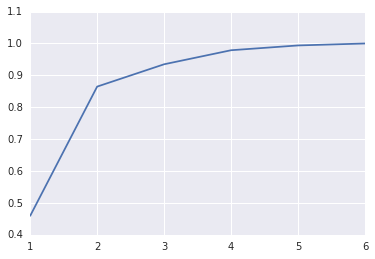

In [43]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
np.set_printoptions(precision=2, suppress=True)
print ("Principle components:")
print (pca.components_)
plt.plot([1, 2, 3, 4, 5, 6],np.cumsum(pca.explained_variance_ratio_))
print ("variance explained ratio")
print(np.cumsum(pca.explained_variance_ratio_))

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

The variance explanation rate drops from 100% to 93% from 6 to 3 dimensions. It further drop to 86% with 2 dimensions and 46% with 1 dimension.

I would choose 2 dimensions. Firstly, 2 dimension can explain about 86% of the variable which is a big portion. Secondly, choose 2 dimension is easy to visualize in a scatter plot.


**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

1st dimension (1st row):
[-0.98 -0.12 -0.06 -0.15  0.01 -0.07]         
The largest  component is Fresh.

2nd dimension (2nd row):
[-0.11  0.52  0.76 -0.02  0.37  0.06]            
The largest component are Grocery and Milk.

From this information we know: 
PC1: the prevalent component is from Fresh. And it has little correlation with other features. 
PC2: the prevalent component are from Grocery, Milk and Detergents_Paper. The signs of the components are the same, so they are positively correlated.

Based on this information, firstly, the company can know where the largest variation comes from. In this case, it is from the fresh. Secondly, the company can know which products are correlated so that they can be bundled together in their delivery. In this case, the grocery, milk and detergents are often positively correlated with each other.


###ICA

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

In [44]:
from sklearn.decomposition import FastICA
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

data_mean = data.mean(axis=0)
data_centered = data - data_mean
data_scaled = data_centered/data_centered.std(axis = 0)
#print(data_centered)

ica = FastICA(n_components=6, random_state=42)
ica.fit_transform(data_scaled)
# center first
# Print the independent components

normalized = np.apply_along_axis(lambda x: x/np.max(abs(x)), 1, ica.components_)
np.set_printoptions(precision=2, suppress=True)
print ("Independent components:")
print (ica.components_)
print ("Normalized")
np.set_printoptions(precision=2, suppress=True)
print (normalized)


Independent components:
[[-0.01 -0.    0.01  0.05 -0.   -0.02]
 [ 0.   -0.01  0.07  0.   -0.01 -0.01]
 [-0.   -0.   -0.01 -0.    0.    0.05]
 [-0.    0.02  0.11 -0.01 -0.13 -0.02]
 [-0.05  0.01  0.01  0.   -0.01  0.  ]
 [-0.   -0.07  0.06  0.   -0.02  0.02]]
Normalized
[[-0.2  -0.02  0.14  1.   -0.05 -0.31]
 [ 0.04 -0.18  1.    0.02 -0.2  -0.08]
 [-0.1  -0.03 -0.11 -0.05  0.05  1.  ]
 [-0.03  0.14  0.82 -0.05 -1.   -0.12]
 [-1.    0.13  0.15  0.06 -0.23  0.05]
 [-0.03 -1.    0.78  0.02 -0.24  0.23]]


Answer: 

ICA separate data into independent source. The data is from different shops, and therefore its source are different type of customers.

1st row: [-0.2  -0.02  0.14  1.   -0.05 -0.31]      
Large components: “Frozen ” (positive),  “Delicatessen”(negative )      
Typical customer: people who like to buy a lot of frozen food and less cooked food. 

2nd row [ 0.04 -0.18  1.    0.02 -0.2  -0.08]        
Large components: “Grocery ” (positive),       
Typical customer: people who mainly buy grocery

3rd row  [-0.1  -0.03 -0.11 -0.05  0.05  1.  ]      
Large components: “Delicatessen” (positive),        
Typical customer: people who mainly buy Delicatessen. They like to shop in deli stores.


4th [-0.03  0.14  0.82 -0.05 -1.   -0.12]     
Large components: “Detergents_Paper ” (negative), Grocery (positive),   
Typical customer: people who mainly buy food and fewer detergents and paper. They would more like to shop in grocery stores than pharmacies store. The latter carry more paper products than food.


5th  [-0.03 -1.    0.78  0.02 -0.24  0.23]       
Large components: “Milk ” (negative), Grocery (positive )        
Typical customer: people who buy food in Grocery stores but they don’t buy milk. 

The company can use the ICA component to know the hidden variables in the data. In this case, it’s likely to be different customer segments who shop in the stores. The delivery company will then know who are the primary customer of the stores which the company serves. Then the delivery company can then tailor its service to the needs of different customer segments.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

k-mean

Advantages:
(1) converge fast
(2) do not assume the data to be gaussian distribution

Disadvantage: 
(1)algorithm converge to a local optimum, so it is necessary to run the algorithm multiple times with random initial point.

Gaussian mixture models

Advantage:
(1) use soft assignment (compute the probability of the data belong to one class)

Disadvantage:
(1) computational cost increases dramatically with dimensionality.
(2) use hard assignment (either the data belong to one class or not )

Other differences:

(1) Decision Boundary: k-mean has linear decision boundary; Gaussian Mixture Models has nonlinear decision boundary.
(2) Structural information:  Gaussian Mixture Models can reveal the mean and covariance of a cluster. K-mean cannot give structural information.


I choose k-mean for the following reasons: 

(1) the algorithm does not assume the data to be gaussian distribution 
(2) The computation cost is lesser than Gaussian mixture models



**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [45]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [46]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca_2d = PCA(n_components = 2)
pca_2d.fit(data)
reduced_data = pca_2d.fit_transform(data)
np.set_printoptions(precision=0, suppress=True)
print (reduced_data[:10])  # print upto 10 elements

[[  -650.   1586.]
 [  4427.   4042.]
 [  4842.   2579.]
 [  -990.  -6280.]
 [-10658.  -2160.]
 [  2766.   -960.]
 [   716.  -2013.]
 [  4475.   1429.]
 [  6712.  -2206.]
 [  4824.  13481.]]


In [47]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
from sklearn import mixture

clusters= KMeans(n_clusters=5, random_state=42)
clusters.fit(reduced_data)


print (clusters)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)


In [48]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
#Z_gm = clusters_gmm.predict(np.c_[xx.ravel(), yy.ravel()])

In [49]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
import numpy 
centroids = clusters.cluster_centers_
#centroids_gm = clusters_gmm.means_ 
print ("Centroids:")
print (centroids)


Centroids:
[[  6413.  -4128.]
 [ -8916.  -4762.]
 [-37090.  -5656.]
 [  5559.  14313.]
 [-14538.  61716.]]


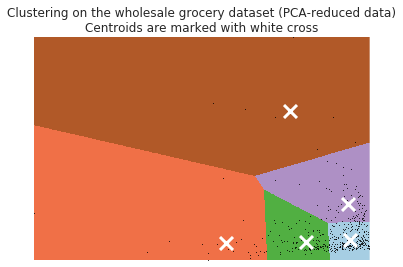

In [50]:
# Put the result into a color plot
def visual(Z,xx,yy,centroids):
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
                  'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

visual(Z,xx,yy,centroids)

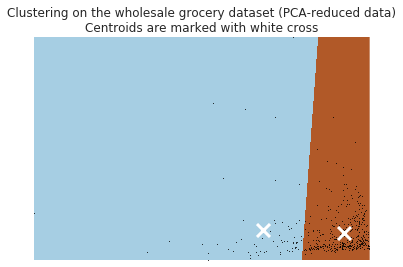

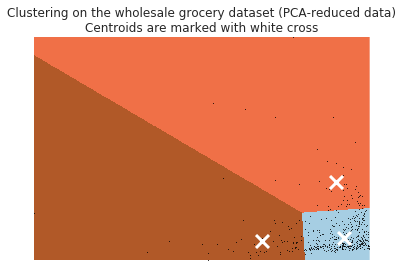

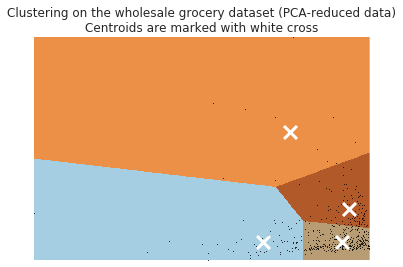

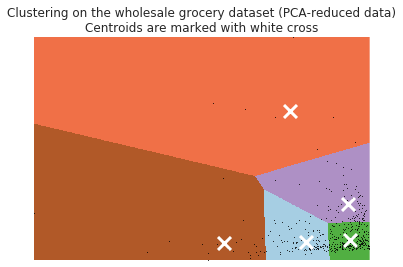

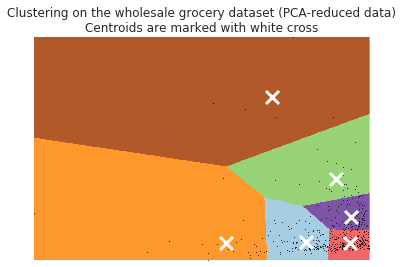

In [51]:
# plot different cluster
nc= [2, 3, 4,5,6]
for n in range(len(nc)):
    clusters= KMeans(n_clusters=nc[n], random_state=1)
    clusters.fit(reduced_data)
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))
    centroids = clusters.cluster_centers_
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    visual(Z,xx,yy,centroids)

Evaluation of KMeans with random init


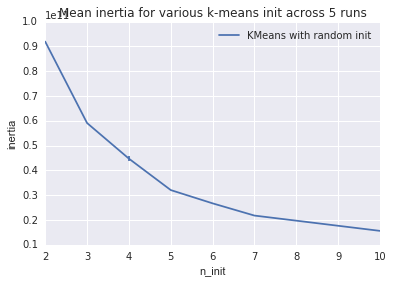

In [52]:

# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.utils import shuffle
from sklearn.utils import check_random_state
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

random_state = np.random.RandomState(42)

# Number of run (with randomly generated dataset) for each strategy so as
# to be able to compute an estimate of the standard deviation
n_runs = 5

# k-means models can do several random inits so as to be able to trade
# CPU time for convergence robustness

N_clusters = [2,3,4,5,6,7,10]
n_init = 3;
# Part 1: Quantitative evaluation of various init methods

fig = plt.figure()
plots = []
legends = []

cases = [ (KMeans, 'random', {})]

for factory, init, params in cases:
    print("Evaluation of %s with %s init" % (factory.__name__, init))
    inertia = np.empty((len(N_clusters), n_runs))

    for run_id in range(n_runs):
        #X, y = make_data(run_id, n_samples_per_center, grid_size, scale)  
        X = reduced_data
        #for i, n_init in enumerate(n_init_range):
        for i, n_clusters in enumerate(N_clusters):
            km = factory(n_clusters=n_clusters, init=init, random_state=run_id,
                         n_init=n_init, **params).fit(X)
            inertia[i, run_id] = km.inertia_
    p = plt.errorbar(N_clusters, inertia.mean(axis=1), inertia.std(axis=1))
    plots.append(p[0])
    legends.append("%s with %s init" % (factory.__name__, init))
#print(inertia)
plt.xlabel('n_init')
plt.ylabel('inertia')
plt.legend(plots, legends)
plt.title("Mean inertia for various k-means init across %d runs" % n_runs)



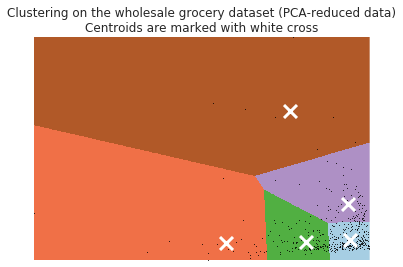

Centroids:
[[  6413.  -4128.]
 [ -8916.  -4762.]
 [-37090.  -5656.]
 [  5559.  14313.]
 [-14538.  61716.]]
transform to original dimension
[[  6194.   2890.   4400.   2172.   1418.    852.]
 [ 21234.   4420.   4859.   4520.   1079.   1860.]
 [ 48846.   7374.   5909.   8829.    553.   3728.]
 [  4989.  12505.  18553.   1957.   8150.   1963.]
 [ 19370.  39391.  56034.   4131.  25327.   6038.]]


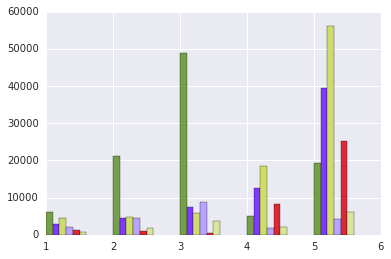

In [53]:
nc= 5
clusters= KMeans(n_clusters=nc, random_state=42)
clusters.fit(reduced_data)
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))
centroids = clusters.cluster_centers_
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
visual(Z,xx,yy,centroids)

print ("Centroids:")
print (centroids)
print ("transform to original dimension")
print(pca_2d.inverse_transform(centroids))

data = pca_2d.inverse_transform(centroids)

import matplotlib.pyplot as pyplot

# plot the orignial categories
x1 =[1,2,3,4,5]

for n in range(0,6):
    x = [ s + 0.1*n for s in x1 ] 
    y = data[:,n]
    pyplot.bar(x,y, width=0.1, color=numpy.random.rand(3,1))

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

I choose 5 cluster for the following reason:    
The inertia value plateaued after 5 clusters. In addition, after 6 clusters, some of the cluster have very few samples and thus they are less representative. 


centroid 1:            
original dimension:[  6194.   2890.   4400.   2172.   1418.    852.]   
Region: blue;       
Description: stores sell a low volume of fresh and low a volume of grocery and other products (the majority of stores)

centroid 2:    
original dimension: [ 21234.   4420.   4859.   4520.   1079.   1860.]    
Region: green;          
Description: stores sell a medium volume of fresh and a low volume of grocery and other products

centroid 3:       
original dimension:  [ 48846.   7374.   5909.   8829.    553.   3728.]      
Region: orange;          
Description: stores sell a high volume of fresh and a low volume of grocery and other products

centroid 4:   
original dimension: [  4989.  12505.  18553.   1957.   8150.   1963.]      
Region: purple;          
Description: stores sell a medium volume of grocery and low volume of fresh

centroid 5:      
original dimension: [ 19370.  39391.  56034.   4131.  25327.   6038.]        
Region: brown;       
Description: stores sell a high volume of grocery and other product and a medium volume of fresh.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?


Answer: 

I feel the PCA gives me the most insight into the data. 

Firstly, it enables visualization by reducing the dimension to 2.  So that we can visually see the data points.

Secondly, it tells the correlation between the features. For example, from the 1st principle component we know the fresh has litter correlation with other categories and form 2nd principal component, we know grocery, milk and detergent paper is often  change together.

**9)** How would you use that technique to help the company design new experiments?

Answer:

A/B testing can be used to evaluate a new delivery scheme. The company can compare the new versions of a delivery scheme (variation group) against the existing scheme (control group) to determine if the new one is better. 
The information of segmentation can help finding a representative control group and variation group in the A/B test. In each group, there should be customers from each segments. So the effect of the new deliver scheme to each customer segments can be analysed.
Before, when the company is unaware of the different customer segments, the effect on smaller customer segments is likely to be overshadowed by that of the large segments.

**10)** How would you use that data to help you predict future customer needs?

Answer:

In the future,  after the company acquire a new customer, it can know what customer segment it belongs to by classify it into an existing cluster using superivsed learning (e.g. nearest neighbor).
Then the company can predict the need of the new customer based on their knowledge of that customer segment and even recommend services to them.

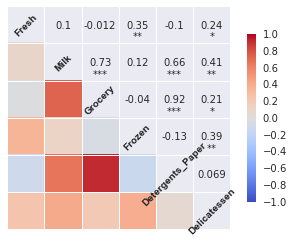

In [54]:
import seaborn as sns
sns.corrplot(data_scaled)